In [4]:
#!pip install contractions

     |████████████████████████████████| 283 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 7.9 MB/s eta 0:00:01
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp38-cp38-macosx_10_9_x86_64.whl size=32389 sha256=29bc07fc7802ddeb7a7a6ecda9cfa773b0b940b69dc50ae238b3c9d71b65ca87
  Stored in directory: /Users/danielmartinez/Library/Caches/pip/wheels/74/bc/b8/e5f739a84005620cfe66d3fcb8bb182e309d6056bc6700b60e
Successfully built pyahocorasick


### Import the libraries, load dataset, print shape of data, data description.

In [1]:
import numpy as np
import pandas as pd 
import nltk

import re, string, unicodedata
import contractions                                     
from bs4 import BeautifulSoup 

nltk.download('stopwords')                            
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       
from nltk.tokenize import word_tokenize, sent_tokenize  
from nltk.stem.wordnet import WordNetLemmatizer


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmartinez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/danielmartinez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/danielmartinez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
dataset = pd.read_csv('Tweets.csv')

In [3]:
dataset.shape

(14640, 15)

In [4]:
dataset.head(10).T

,0,1,2,3,4,5,6,7,8,9
tweet_id,570306133677760513,570301130888122368,570301083672813571,570301031407624196,570300817074462722,570300767074181121,570300616901320704,570300248553349120,570299953286942721,570295459631263746
airline_sentiment,neutral,positive,neutral,negative,negative,negative,positive,neutral,positive,positive
airline_sentiment_confidence,1,0.3486,0.6837,1,1,1,0.6745,0.634,0.6559,1
negativereason,NaN,NaN,NaN,Bad Flight,Can't Tell,Can't Tell,NaN,NaN,NaN,NaN
negativereason_confidence,NaN,0,NaN,0.7033,1,0.6842,0,NaN,NaN,NaN
airline,Virgin America,Virgin America,Virgin America,Virgin America,Virgin America,Virgin America,Virgin America,Virgin America,Virgin America,Virgin America
airline_sentiment_gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,cairdin,jnardino,yvonnalynn,jnardino,jnardino,jnardino,cjmcginnis,pilot,dhepburn,YupitsTate
negativereason_gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0,0,0,0,0,0,0,0,0,0


In [5]:
dataset.describe
#data description 

<bound method NDFrame.describe of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativere

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
dataset.isnull().sum(axis=0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### Undestanding the data columns (5 Marks)

#### a. Drop all other columns except 'text' and 'airline_sentiment'

In [8]:
data = dataset.drop(['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'], axis=1)
#Eliminate in the axis 1 all the columns.

#### b. Check the shape of data

In [9]:
data.shape

(14640, 2)

#### c. Print first 5 rows of data

In [10]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [11]:
data.shape

(14640, 2)

In [12]:
#show all the text in the row. 
pd.set_option('display.max_colwidth', None)
data.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [13]:
data.isnull().sum(axis=0)
#verification of null values in dataframe 

airline_sentiment    0
text                 0
dtype: int64

## Text pre-processing
### Data preparation
#### a.HTML tag removal

In [14]:
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
data['text'] = data['text'].apply(lambda x: remove_html(x))
data.head()
#this function will eliminate any HTML tag in the text. 

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [15]:
def replace_contractions(text):
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()
# remove contraction from text sush didn't remplace for did not. 

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


#### c. Remove the numbers.

In [16]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', str(text))
    return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()
#this function remove all the number of the text column using regular expression import re. 

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


#### b. Tokenization. 

In [17]:
# Tokenization split each word of the string with a comma ,

data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']),axis=1)

In [18]:
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


##### Storpwords customization

In [19]:
stopwords = stopwords.words('english')
customlist = ['not','won']
#This code customize the tentative words that can have a direct impact in the sentiment analysis. 

stopwords = list(set(stopwords) - set(customlist)) 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


#### d. Removal of Special Characters and Punctuations  and stopwords

In [21]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    #Remove non-ASCII characters 
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    #Remove punctuation 
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    #Remove stopwords 
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

#### e. Conversion to lowercase

In [22]:
def to_lowercase(words):
    #Convert all letters in lowercase in the text
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#### f. Lemmatize or Stemming

In [23]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words



#### Normalize and join the words in the list to convert back to text string in the dataframe

In [24]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)#join the words in the list

#### print first 5 rows of data after pre-processing

In [25]:
data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head(5)
# ending of the pre-processing of dataframe. 

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica not today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


### Vectorization CountVerctorizer

In [26]:
# Vectorization is the technic to convert text data to numbers.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=3000)              
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

In [27]:
data_features.shape

(14640, 3000)

In [28]:
data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
labels = data['airline_sentiment']
labels = labels.astype('str')

#### Fit and evaluate the model Bag of words

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [31]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7185109289617486


In [32]:
result = forest.predict(X_test)

[[2552  181   81]
 [ 396  412   76]
 [ 209  104  381]]
Accuracy score:  76.16120218579235 



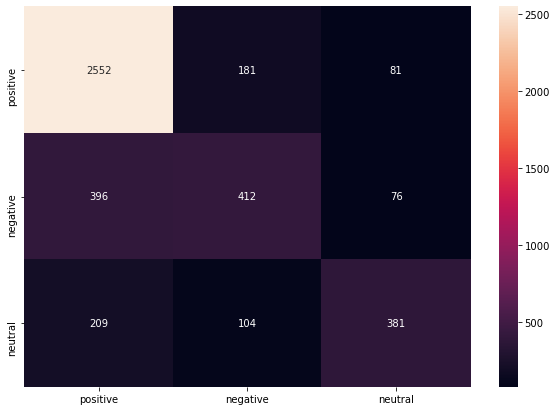

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ["positive","negative",'neutral']],
                  columns = [i for i in ["positive","negative",'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')


print('Accuracy score: ', accuracy_score(y_test, result)*100,'\n')

In [34]:
print(classification_report(y_test, result))

              precision    recall  f1-score   support

    negative       0.81      0.91      0.85      2814
     neutral       0.59      0.47      0.52       884
    positive       0.71      0.55      0.62       694

    accuracy                           0.76      4392
   macro avg       0.70      0.64      0.66      4392
weighted avg       0.75      0.76      0.75      4392



### Vectorization TfidVerctorizer

In [35]:
#vectorization TfidVectorize in the technic to change text data to numbers. 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 1000)

In [37]:
data_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
# The model with a 30% of test data. 

In [39]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

#### Fit and evaluate the model TF-IDF

In [40]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7113387978142076


In [41]:
result = forest.predict(X_test)

Accuracy score:  75.2959927140255 



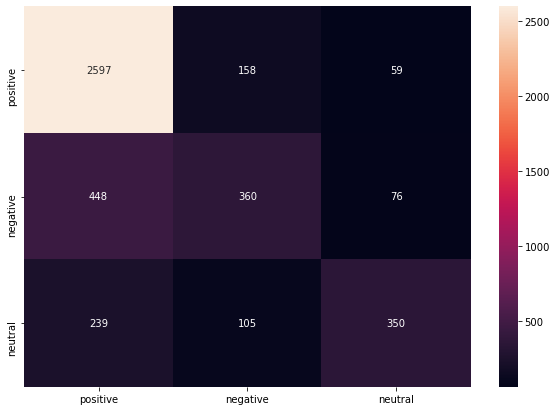

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ["positive","negative",'neutral']],
                  columns = [i for i in ["positive","negative",'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

print('Accuracy score: ', accuracy_score(y_test, result)*100,'\n')

In [43]:
print(classification_report(y_test, result))

              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      2814
     neutral       0.58      0.41      0.48       884
    positive       0.72      0.50      0.59       694

    accuracy                           0.75      4392
   macro avg       0.70      0.61      0.64      4392
weighted avg       0.74      0.75      0.74      4392



In [44]:
X_test.shape

(4392, 1000)

In [45]:
X_train.shape

(10248, 1000)

### Summarize your understanding of the application of Various Pre-processing and Vectorization andperformance of your model on this dataset. (8 Marks)

- I used dataset that have text format and sentiment values such positive, negative and neutral. 
- I pre-processing the data using diffent techniques and libreries. 
- Remove the HTML tag, remove numbers, remove special characters and puntuations, conversion to lowercase and more pre-processing of dataframe. 
- The propuse of this code if create a model of text-classification. 
- I used total value of data that is 14640 for creation of the model. 
- After pre-processing the data I apply Bag of words and TF-IDF.
- I use random forest for creation of the classificatio model.
- The processing model provide an cross validation of 72%.
- The model have an accuracy score of 75%.
- the classification report show a precicison of negative 79%, positive 78% and neural 57% last one with low presion, recall, f1-score.
